In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [57]:
# Load the dataset
data = pd.read_csv("LoanApprovalPrediction.csv")

# Drop the Loan_ID column
data.drop(['Loan_ID'], axis=1, inplace=True)

# Check for categorical variables
obj = (data.dtypes == 'object')
categorical_cols = list(obj[obj].index)
print("Number of Categorical variables:", len(categorical_cols))

Number of Categorical variables: 6


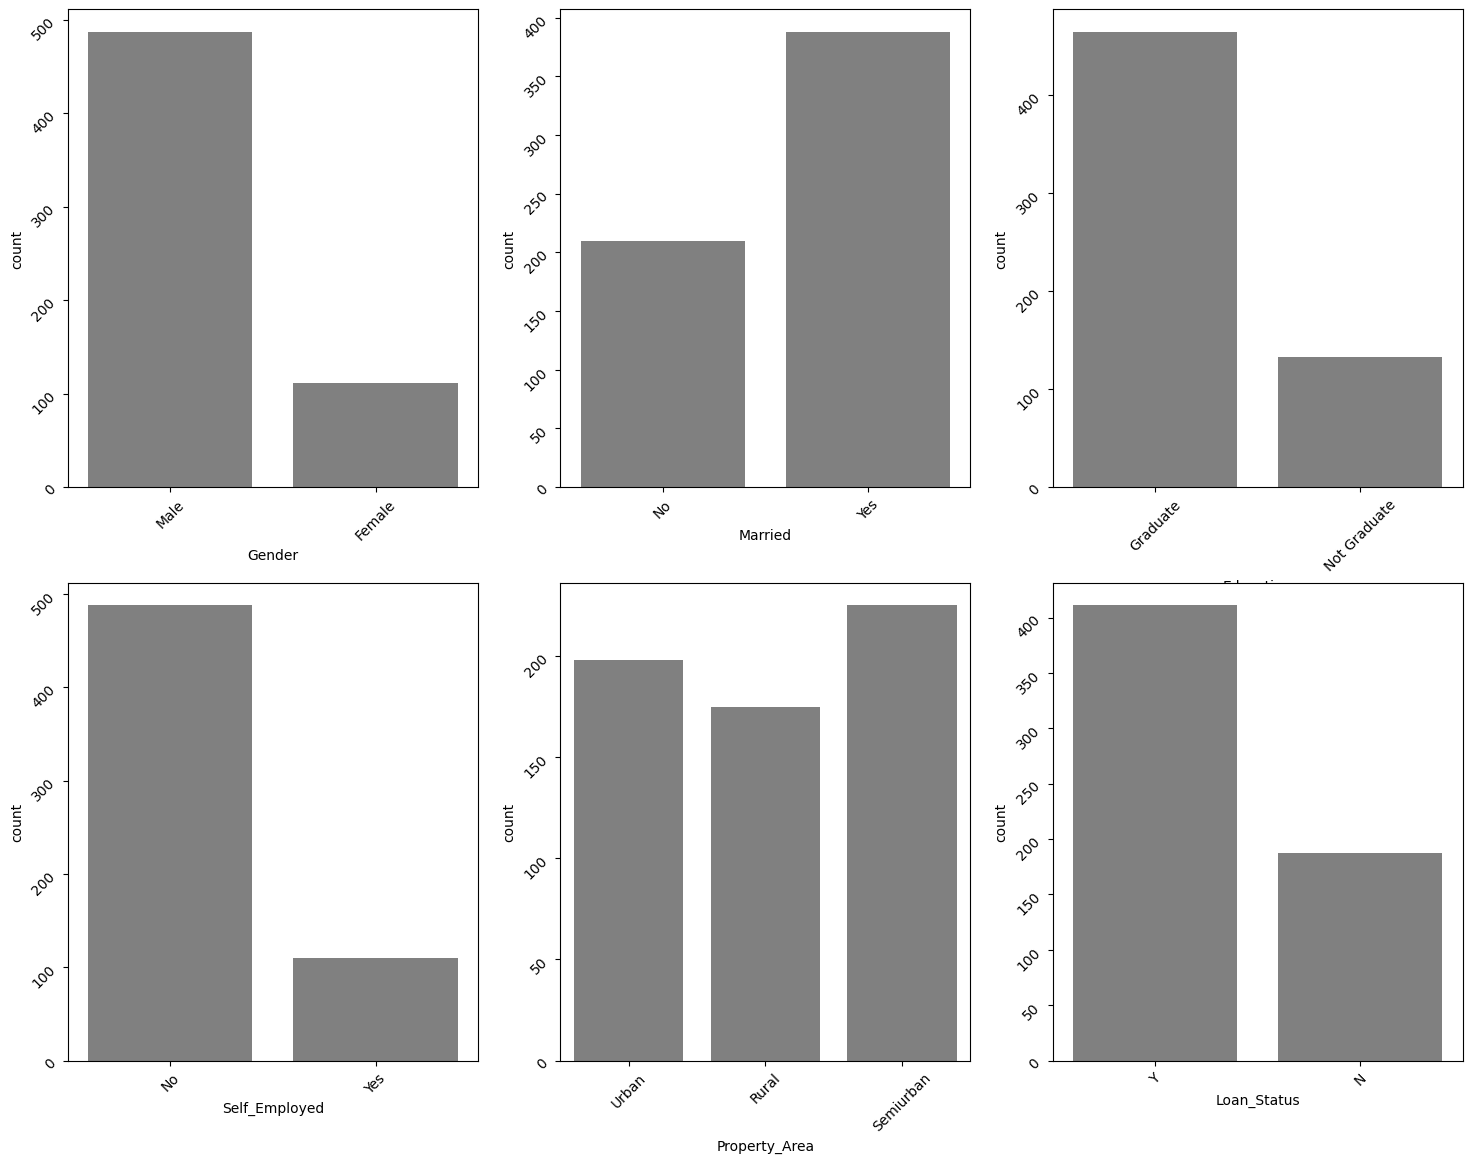

In [58]:
# Visualize categorical variables
plt.figure(figsize=(18, 36))
index = 1
for col in categorical_cols:
    plt.subplot(5, 3, index)
    sns.countplot(x=col, data=data,color="gray")
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    index += 1

In [59]:
# Encode categorical variables
label_encoder = preprocessing.LabelEncoder()
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

<Axes: >

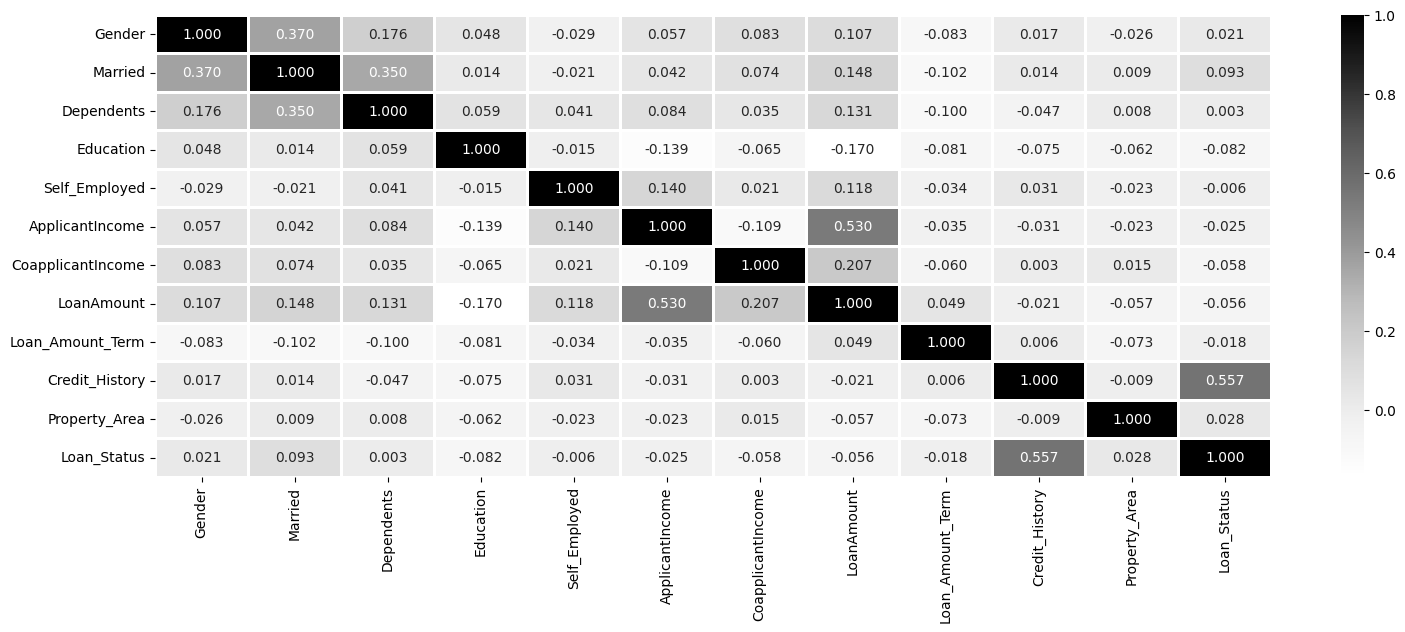

In [60]:
# Visualize correlation using heatmap
plt.figure(figsize=(18, 6))
sns.heatmap(data.corr(), cmap='Grays', fmt='.3f', linewidths=2, annot=True)

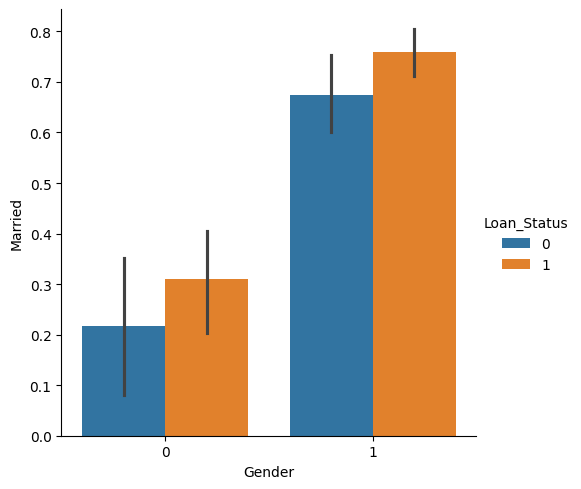

In [61]:
# Visualize relationship between Gender, Married, and Loan_Status
sns.catplot(x="Gender", y="Married", hue="Loan_Status", kind="bar", data=data)

In [62]:
# Handle missing values by filling with mean
imputer = SimpleImputer(strategy='mean')
data[data.columns] = imputer.fit_transform(data[data.columns])

In [63]:
# Split data into features and target variable
X = data.drop(['Loan_Status'], axis=1)
Y = data['Loan_Status']

In [82]:
# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.6, random_state=1)

In [115]:
# Initialize classifiers with updated parameters
classifiers = [
    RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=10),
    make_pipeline(PolynomialFeatures(degree=3), LinearRegression()),
    KNeighborsClassifier(n_neighbors=3),
    SVC(kernel='rbf', C=3, gamma='scale', random_state=42),
    DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=4, random_state=100),
]

# Train and evaluate classifiers
for classifier in classifiers:
    classifier.fit(X_train, Y_train)
    Y_pred_train = classifier.predict(X_train)
    # Convert Y_pred_train to binary labels if necessary
    if len(np.unique(Y_pred_train)) > 2:
        Y_pred_train = np.where(Y_pred_train > 0.5, 1, 0)
    accuracy_train = accuracy_score(Y_train, Y_pred_train)
    print("Accuracy score of", classifier.__class__.__name__, "=", accuracy_train * 100, "%")

# Initialize Logistic Regression with increased max_iter
logistic_regression = LogisticRegression(max_iter=10000)

# Train logistic regression
logistic_regression.fit(X_train, Y_train)

# Predict on training set
Y_pred_train_logistic = logistic_regression.predict(X_train)

# Compute accuracy score
accuracy_train_logistic = accuracy_score(Y_train, Y_pred_train_logistic)
print("Accuracy score of Logistic Regression =", accuracy_train_logistic * 100, "%")

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression with scaled data
logistic_regression_scaled = LogisticRegression(max_iter=10000)
logistic_regression_scaled.fit(X_train_scaled, Y_train)

# Predict on scaled training set
Y_pred_train_logistic_scaled = logistic_regression_scaled.predict(X_train_scaled)

# Compute accuracy score
accuracy_train_logistic_scaled = accuracy_score(Y_train, Y_pred_train_logistic_scaled)
print("Accuracy score of Logistic Regression with scaled data =", accuracy_train_logistic_scaled * 100, "%")


Accuracy score of RandomForestClassifier = 98.74476987447699 %
Accuracy score of Pipeline = 99.16317991631799 %
Accuracy score of KNeighborsClassifier = 78.24267782426779 %
Accuracy score of SVC = 70.29288702928869 %
Accuracy score of DecisionTreeClassifier = 89.9581589958159 %
Accuracy score of Logistic Regression = 80.3347280334728 %
Accuracy score of Logistic Regression with scaled data = 80.75313807531381 %
